In [38]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Importing data (just original for now)

In [39]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [40]:
data = pd.read_csv("../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")
data['Source'] = 'Original'

In [41]:
X = data[features_num]
y = data[[y_column, 'Source', 'Xray', 'Opt_spec', 'IRAGN', 'Donley']]

## Filling nan's

In [42]:
# fill nans with 0s
X_filled = X.fillna(0)

## Scaling (necessary for proper usage of T-sne)

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_filled = scaler.fit_transform(X_filled)

## Running t-sne

In [58]:
tsne = TSNE(perplexity=68, 
            init='random', 
            n_iter=10**4, 
            verbose=5, 
            n_jobs=64, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto',
            random_state=42
           )

In [59]:
X_transformed = tsne.fit_transform(X_filled)

[t-SNE] Computing 205 nearest neighbors...
[t-SNE] Indexed 77609 samples in 0.007s...
[t-SNE] Computed neighbors for 77609 samples in 33.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 77609
[t-SNE] Computed conditional probabilities for sample 2000 / 77609
[t-SNE] Computed conditional probabilities for sample 3000 / 77609
[t-SNE] Computed conditional probabilities for sample 4000 / 77609
[t-SNE] Computed conditional probabilities for sample 5000 / 77609
[t-SNE] Computed conditional probabilities for sample 6000 / 77609
[t-SNE] Computed conditional probabilities for sample 7000 / 77609
[t-SNE] Computed conditional probabilities for sample 8000 / 77609
[t-SNE] Computed conditional probabilities for sample 9000 / 77609
[t-SNE] Computed conditional probabilities for sample 10000 / 77609
[t-SNE] Computed conditional probabilities for sample 11000 / 77609
[t-SNE] Computed conditional probabilities for sample 12000 / 77609
[t-SNE] Computed conditional probabilities for s

In [60]:
y.Classification.value_counts()

star-forming galaxy                                     56640
jet-mode radio AGN/low-excitation radio galaxy          12767
radio-quiet AGN                                          6870
quasar-like radio AGN / high-excitation radio galaxy     1332
Name: Classification, dtype: int64

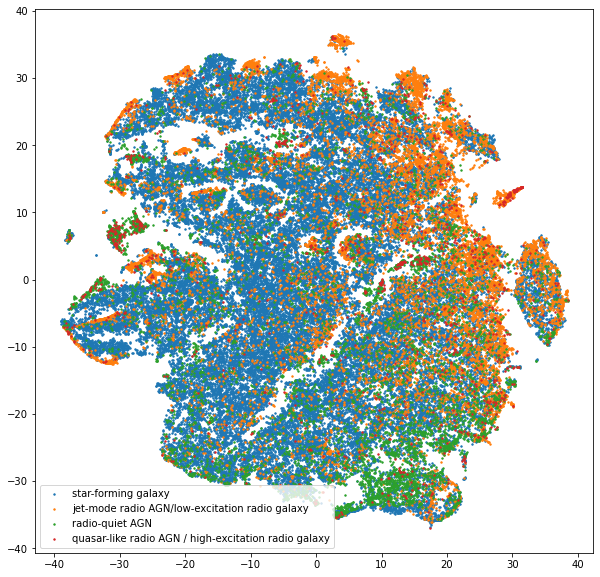

In [61]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y['Classification']==i
    plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=2, label=i)
plt.legend()
plt.show()

## In a loop

In [ ]:
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in range(3,100,1):
    print(f"Working on perplexity {i}")
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=64, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_filled)
    
    plt.figure(figsize=(10,10))
    for name in classes:
        filt = y['Classification']==name
        plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=2, label=name)
    plt.legend()
    plt.savefig(f"./Output/t-sne/{i}.png")
    

Working on perplexity 3
Working on perplexity 4
Working on perplexity 5
Working on perplexity 6
Working on perplexity 7
Working on perplexity 8
Working on perplexity 9
Working on perplexity 10
